# OpenF1

Import libraries and set base url to Open F1

In [2]:
from urllib.request import urlopen
from urllib.parse import quote
import json
import matplotlib.pyplot as plt

base_url = "https://api.openf1.org/v1"

# Norris v Piastri Chinese GP Lap times

1. Get driver numbers

Noris driver number: 4

Piastri driver number: 81

2. Get session id

In [8]:
country_name = "China"
session_name = quote("Race") #url encoded
year = 2025

response = urlopen(base_url +'/sessions?country_name=' +country_name +'&session_name=' +session_name +'&year=' +str(year))
data = json.loads(response.read().decode('utf-8'))

print(data)

session_key = data[0]['session_key']
print('Session key: ' +str(session_key))

[{'session_key': 9998, 'session_name': 'Race', 'date_start': '2025-03-23T07:00:00+00:00', 'date_end': '2025-03-23T09:00:00+00:00', 'gmt_offset': '08:00:00', 'session_type': 'Race', 'meeting_key': 1255, 'location': 'Shanghai', 'country_key': 53, 'country_code': 'CHN', 'country_name': 'China', 'circuit_key': 49, 'circuit_short_name': 'Shanghai', 'year': 2025}]
Session key: 9998


3. Get first lap time

In [21]:
sesson_key = 9998
norris_driver_number = 4
piastri_driver_number = 81

norris_lap_time_ms = []
piastri_lap_time_ms = []

lap_number = 2

#norris lap 1
response = urlopen(base_url +'/laps?session_key=' +str(sesson_key) +'&driver_number=' +str(norris_driver_number) +'&lap_number=' +str(lap_number))
data = json.loads(response.read().decode('utf-8'))

#single lap as per request
for lap in data:
    lap_duration = lap['lap_duration']
    print(lap_duration)
    norris_lap_time_ms.append(lap_duration)

#piastri lap 1
response = urlopen(base_url +'/laps?session_key=' +str(sesson_key) +'&driver_number=' +str(driver_number) +'&lap_number=' +str(lap_number))
data = json.loads(response.read().decode('utf-8'))
    
#single lap as per request
for lap in data:
    lap_duration = lap['lap_duration']
    print(lap_duration)
    norris_lap_time_ms.append(lap_duration)

    
    print("~~~~~~")
print(norris_lap_time_ms)

97.713
97.463
~~~~~~
[97.713, 97.463]


4. Loop for 56 laps

In [28]:
sesson_key = 9998
norris_driver_number = 4
piastri_driver_number = 81

norris_lap_time_s = []
piastri_lap_time_s = []

#norris laps
print("~~ Lando's lap times ~~")
response = urlopen(base_url +'/laps?session_key=' +str(sesson_key) +'&driver_number=' +str(norris_driver_number))
data = json.loads(response.read().decode('utf-8'))

#single lap as per request
for lap in data:
    lap_duration = lap['lap_duration']
    #print(lap_duration)
    norris_lap_time_s.append(lap_duration)

print(norris_lap_time_ms)
print(f"Number of laps: {len(norris_lap_time_ms)}")
print("")

#piastri laps
print("~~ Oscar's lap times ~~")
response = urlopen(base_url +'/laps?session_key=' +str(sesson_key) +'&driver_number=' +str(driver_number))
data = json.loads(response.read().decode('utf-8'))
    
#single lap as per request
for lap in data:
    lap_duration = lap['lap_duration']
    #print(lap_duration)
    piastri_lap_time_s.append(lap_duration)

    
print(piastri_lap_time_ms)
print(f"Number of laps: {len(piastri_lap_time_ms)}")

~~ Lando's lap times ~~
[None, 97.713, 97.597, 97.719, 97.917, 97.856, 98.174, 98.287, 98.514, 98.316, 98.118, 98.197, 98.349, 98.389, 103.269, 115.657, 97.432, 97.477, 97.679, 98.122, 97.979, 97.336, 97.321, 96.952, 97.357, 97.132, 96.754, 96.509, 96.531, 96.335, 96.367, 96.862, 96.774, 97.195, 96.854, 96.316, 96.274, 96.192, 96.217, 96.397, 96.661, 96.868, 96.971, 96.743, 96.396, 96.07, 95.857, 95.708, 95.666, 95.675, 95.9, 95.851, 95.454, 96.872, 98.96, 99.418]
Number of laps: 56

~~ Oscar's lap times ~~
[None, 97.463, 97.774, 97.643, 97.821, 98.463, 98.464, 98.715, 98.557, 98.438, 98.375, 98.391, 98.211, 103.046, 114.236, 96.812, 97.85, 98.865, 97.929, 98.472, 97.964, 97.335, 97.155, 97.334, 97.399, 97.284, 97.057, 96.908, 96.661, 97.19, 96.983, 97.2, 97.1, 96.853, 96.664, 96.688, 96.739, 96.581, 96.548, 96.488, 96.471, 96.337, 96.459, 96.576, 96.574, 96.3, 96.283, 96.192, 96.106, 96.166, 96.208, 96.385, 96.504, 95.9, 95.816, 95.908]
Number of laps: 56


6. Graph the 2 lists

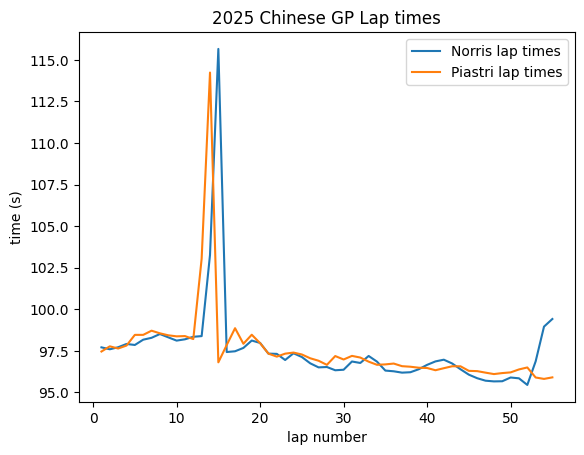

In [29]:
# x axis values
x = list(range(0, 56))

# plotting the points 
plt.plot(x, norris_lap_time_s, label = "Norris lap times")
plt.plot(x, piastri_lap_time_s, label = "Piastri lap times")

# naming the x axis
plt.xlabel('lap number')
# naming the y axis
plt.ylabel('time (s)')

# giving a title to my graph
plt.title('2025 Chinese GP Lap times')
plt.legend()

# function to show the plot
plt.show()

# Tsunoda @ Suzuka - 2024 v 2025

Driver number: 22

No of laps: 53

Get session id

In [12]:
country_name = "Japan"
session_name = quote("Race")

def get_session_id(year):
    response = urlopen(base_url +'/sessions?country_name=' +country_name +'&session_name=' +session_name +'&year=' +str(year))
    return json.loads(response.read().decode('utf-8'))

session_2024 = get_session_id(2024)
session_key = session_2024[0]['session_key']
print('2024 Race session key: ' +str(session_key))

#TODO: UPDATE TO 2025 SESSION KEY - NOT AVAILABLE YET
# session_2025 = get_session_id(2025)
# session_key = session_2025[0]['session_key']
# print('2025 Race session key: ' +str(session_key))

2024 Race session key: 9496


Lap times for Suzuka 2024, Yuki in Racing Bulls

In [26]:
def get_lap_times(session_key, driver_number):
    lap_time_s = []
    response = urlopen(base_url +'/laps?session_key=' +str(session_key) +'&driver_number=' +str(yuki_driver_number))
    data = json.loads(response.read().decode('utf-8'))

    for lap in data:
        lap_duration = lap['lap_duration']
        lap_time_s.append(lap_duration)

    return lap_time_s

session_key = 9496
yuki_driver_number = 22

print("~~ Yuki's lap times ~~")
yuki_lap_time_s = get_lap_times(session_key, yuki_driver_number)
yuki_lap_time_s[1] = None
yuki_lap_time_s[2] = None
yuki_lap_time_s[3] = None
print(yuki_lap_time_s)
print(f"Number of laps: {len(yuki_lap_time_s)}")

~~ Yuki's lap times ~~
[None, None, None, None, 99.508, 98.887, 100.998, 118.044, 97.17, 97.496, 97.895, 100.057, 98.98, 98.51, 99.925, 100.096, 97.944, 99.27, 99.658, 99.1, 99.562, 101.916, 117.251, 96.637, 97.073, 97.037, 97.184, 97.227, 97.319, 97.617, 97.676, 98.624, 98.692, 97.793, 97.626, 97.103, 97.419, 97.442, 97.595, 97.441, 97.297, 97.493, 97.498, 97.329, 97.25, 97.046, 97.106, 97.038, 96.557, 96.388, 96.342, 98.195]
Number of laps: 52


Lap times for Suzuka 2025, Yuki in Red Bull

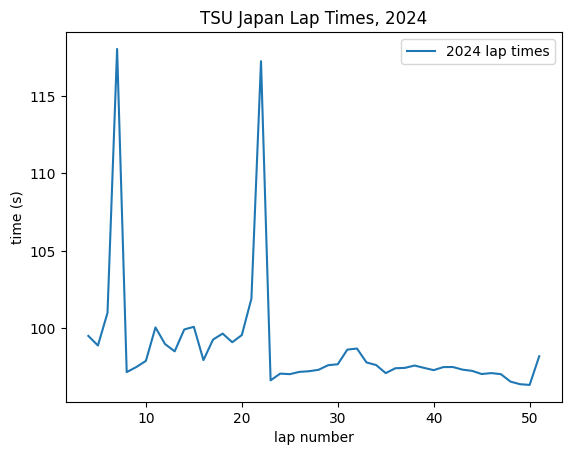

In [27]:
# x axis values
x = list(range(0, 52))

# plotting the points 
plt.plot(x, yuki_lap_time_s, label = "2024 lap times")

# naming the x axis
plt.xlabel('lap number')
# naming the y axis
plt.ylabel('time (s)')

# giving a title to my graph
plt.title('TSU Japan Lap Times, 2024')
plt.legend()

# function to show the plot
plt.show()